<a href="https://colab.research.google.com/github/tensorvijay/Galaxy_orientatation/blob/main/Spectral_Clustring_morph_impact_29_DEC_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob as glob # helps in saving the files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
files_load=np.load('/content/drive/My Drive/galaxy/Base_Line/files_array.npy') #load from saved space address of galaxies
load_resall=np.load('/content/drive/My Drive/galaxy/Base_Line/components1.npy') #ncompnentclassificationofgalaxy
array=load_resall.astype('int32')

In [ ]:
C_CB_25=np.load('/content/drive/MyDrive/galaxy/GAL_25/C_CB_25.npy')

In [ ]:
C_CB_25[1]

'../content/images_training_rev1/274199.jpg'

In [ ]:
def extind(address):
 csplit=address.split('/')[-1].split('.')[0]
 return csplit

In [ ]:
C_CB_25_ind=[]                     ### seperate the index from the addresss
for i in C_CB_25:
 #print(extind(i))
 C_CB_25_ind.append(int(extind(i)))

In [ ]:
len(C_CB_25_ind)

1915

In [ ]:
C_CB_25_ind[2]

350073

In [ ]:
morph=pd.read_csv('/content/drive/MyDrive/galaxy/training_solutions_rev1.csv')

In [ ]:
morph.head()


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.0,0.104752,0.512101,0.000000,0.054453,0.945547,0.201463,0.181684,0.000000,0.0,0.027226,0.000000,0.027226,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.0,0.236781,0.160941,0.234877,0.189149,0.810851,0.000000,0.135082,0.191919,0.0,0.000000,0.140353,0.000000,0.048796,0.000000,0.0,0.012414,0.0,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.0,0.117790,0.059562,0.000000,0.000000,1.000000,0.000000,0.741864,0.023853,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.0,0.000000,0.113284,0.125280,0.320398,0.679602,0.408599,0.284778,0.000000,0.0,0.000000,0.096119,0.096119,0.000000,0.128159,0.0,0.000000,0.0,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.029383,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
morph1=morph[['GalaxyID','Class7.1', 'Class7.2','Class2.1','Class7.3','Class2.2']]

In [ ]:
morph1.head()

,GalaxyID,Class7.1,Class7.2,Class2.1,Class7.3,Class2.2
0,100008,0.201463,0.181684,0.000000,0.000000,0.616853
1,100023,0.000000,0.135082,0.031178,0.191919,0.632599
2,100053,0.000000,0.741864,0.000000,0.023853,0.177352
3,100078,0.408599,0.284778,0.000000,0.000000,0.238564
4,100090,0.494587,0.439252,0.000000,0.000000,0.000000


In [ ]:
morph2= morph1.drop('GalaxyID',axis=1)  #Get maximum Index

In [ ]:
morph2.head()


,Class7.1,Class7.2,Class2.1,Class7.3,Class2.2
0,0.201463,0.181684,0.000000,0.000000,0.616853
1,0.000000,0.135082,0.031178,0.191919,0.632599
2,0.000000,0.741864,0.000000,0.023853,0.177352
3,0.408599,0.284778,0.000000,0.000000,0.238564
4,0.494587,0.439252,0.000000,0.000000,0.000000


In [ ]:
colmax=morph2.idxmax(axis=1)

In [ ]:
colmax.head()

0    Class2.2
1    Class2.2
2    Class7.2
3    Class7.1
4    Class7.1
dtype: object

In [ ]:
colmax.column=['max']

In [ ]:
colmax.count()

61578

In [ ]:
galid=morph['GalaxyID']

In [ ]:
galid.count()

61578

In [ ]:
galid.head()

0    100008
1    100023
2    100053
3    100078
4    100090
Name: GalaxyID, dtype: int64

In [ ]:
result =pd.concat([galid,colmax],axis=1)  #join two dataframes

In [ ]:
result.head()

,GalaxyID,0
0,100008,Class2.2
1,100023,Class2.2
2,100053,Class7.2
3,100078,Class7.1
4,100090,Class7.1


In [ ]:
result.rename(columns={0:'GalaxyCLASS'})

,GalaxyID,GalaxyCLASS
0,100008,Class2.2
1,100023,Class2.2
2,100053,Class7.2
3,100078,Class7.1
4,100090,Class7.1
...,...,...
61573,999948,Class2.2
61574,999950,Class7.2
61575,999958,Class2.2
61576,999964,Class2.2


In [ ]:
seper = result.to_numpy()

In [ ]:
seper.shape

(61578, 2)

In [ ]:
seper


array([[100008, 'Class2.2'],
       [100023, 'Class2.2'],
       [100053, 'Class7.2'],
       ...,
       [999958, 'Class2.2'],
       [999964, 'Class2.2'],
       [999967, 'Class7.2']], dtype=object)

In [ ]:
sep=[]
for i in C_CB_25_ind:
  for j in seper:
   if i == j[0]:
     sep.append(j[1])

In [ ]:
len(sep)


1915

In [ ]:
len(C_CB_25_ind)

1915

In [ ]:
sep[1]

'Class7.2'

In [ ]:
cl,freq=np.unique(sep,return_counts=True)

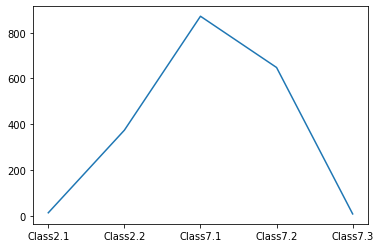

In [ ]:
plt.plot(cl,freq)

In [ ]:
cl

array(['Class2.1', 'Class2.2', 'Class7.1', 'Class7.2', 'Class7.3'],
      dtype='<U8')

In [ ]:
freq

array([ 13, 374, 872, 648,   8])

Class 25 smooth, majorith of the galaxies as indicated in the graph are circular completely and moderately. with featured galaxies spirals and lenticular.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


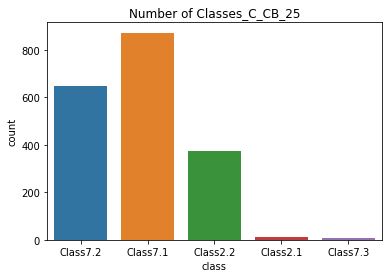

In [ ]:
img=sns.countplot(sep)    # class 25  center majority of the galaxies are cir
plt.xlabel('class')
plt.title('Number of Classes_C_CB_25')
plt.savefig('galaxy_class_count')

In [ ]:
C_CD_25=np.load('/content/drive/MyDrive/galaxy/GAL_25/C_CD_25.npy')

In [ ]:
C_CD_25_ind=[]                     ### seperate the index from the addresss
for i in C_CD_25:
 #print(extind(i))
 C_CD_25_ind.append(int(extind(i)))

In [ ]:
len(C_CD_25_ind)

4045

In [ ]:
C_CD_25_ind[1]

618998

In [ ]:
morph=pd.read_csv('/content/drive/MyDrive/galaxy/training_solutions_rev1.csv')

In [ ]:
morph1=morph[['Class7.1', 'Class7.2','Class2.1','Class7.3','Class2.2']]
morph1.head()

,Class7.1,Class7.2,Class2.1,Class7.3,Class2.2
0,0.201463,0.181684,0.000000,0.000000,0.616853
1,0.000000,0.135082,0.031178,0.191919,0.632599
2,0.000000,0.741864,0.000000,0.023853,0.177352
3,0.408599,0.284778,0.000000,0.000000,0.238564
4,0.494587,0.439252,0.000000,0.000000,0.000000


Load the training solutions for the images and obtain the classes relevent to the analysis under consideration. ( refer Galaxy zoo tree). Here it is circularity and non cirularity

In [ ]:
morph=pd.read_csv('/content/drive/MyDrive/galaxy/training_solutions_rev1.csv')
morph1=morph[['Class7.1', 'Class7.2','Class2.1','Class7.3','Class2.2']]
colmax=morph1.idxmax(axis=1)
colmax.column=['max']
colmax.head()
galid=morph['GalaxyID']
galid.head()
result =pd.concat([galid,colmax],axis=1)  #join two dataframes
result.rename(columns={0:'GalaxyCLASS'})
#result.head()
seper = result.to_numpy()
seper.shape

(61578, 2)

Filter the indices which are seperated by our spectral clustering technique from the available galaxy indices

In [ ]:
sep=[]
for i in C_CD_25_ind:
  for j in seper:
   if i == j[0]:
     sep.append(j[1])
len(sep)

4045

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


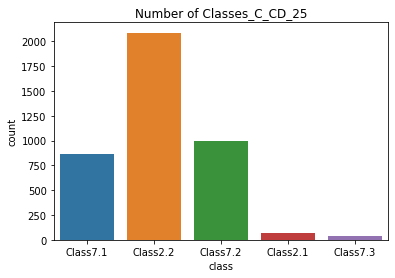

In [ ]:
img=sns.countplot(sep)    # class 25  center majority of the galaxies are cir
plt.xlabel('class')
plt.title('Number of Classes_C_CD_25')
plt.savefig('galaxy_class_count')

Featured galaxies are higher in number compared to non featured galaxies. However one can see the inclination towards the circular shapes present within the structure

In [ ]:
F_CB_25=np.load('/content/drive/MyDrive/galaxy/GAL_25/F_CB_25.npy')  # The galaxies that belong to the
L_CB_25=np.load('/content/drive/MyDrive/galaxy/GAL_25/L_CB_25.npy')
R_CB_25=np.load('/content/drive/MyDrive/galaxy/GAL_25/R_CB_25.npy')



In [ ]:
E_ON=np.concatenate([F_CB_25,L_CB_25,R_CB_25])

In [ ]:
E_ON_ind=[]                     ### seperate the index from the addresss
for i in E_ON:
 #print(extind(i))
 E_ON_ind.append(int(extind(i)))
len(E_ON_ind)

1251

In [ ]:
len(seper)

61578

In [ ]:
sepeon=[]
for i in E_ON_ind:
  for j in seper:
   if i == j[0]:
     sepeon.append(j[1])
len(sepeon)

1251

In [ ]:
sepeon[1]

'Class7.2'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


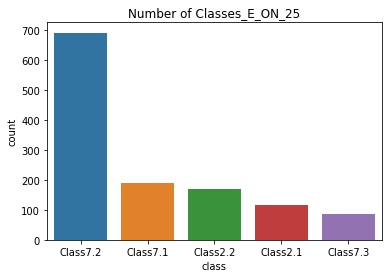

In [ ]:
img=sns.countplot(sepeon)
plt.xlabel('class')
plt.title('Number of Classes_E_ON_25')
plt.savefig('galaxy_class_count')